In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

**QUESTION -1:** Load the dataset and perform following pre-processing tasks:

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SnehaAgg0212/AI_assignments/master/BasicPython/popularity.csv') 
#importing directly from github repo in Google Colab
print(df)

     Unnamed: 0  avg_shares  avg_comments  avg_expert  popularity_score
0            19       147.3          23.9        19.1              14.6
1            91        28.6           1.5        33.0               7.3
2           166        17.9          37.6        21.6               8.0
3           196        94.2           4.9         8.1               9.7
4            42       293.6          27.7         1.8              20.7
..          ...         ...           ...         ...               ...
195         155         4.1          11.6         5.7               3.2
196          80        76.4          26.7        22.3              11.8
197         181       218.5           5.4        27.4              12.2
198         145       140.3           1.9         9.0              10.3
199          36       266.9          43.8         5.0              25.4

[200 rows x 5 columns]


1.1 Remove the first column of ‘Unnamed: 0’

In [ ]:
data = df.drop("Unnamed: 0",axis=1) # Drop the column(axis = 1) Unnamed:0
print(data)

     avg_shares  avg_comments  avg_expert  popularity_score
0         147.3          23.9        19.1              14.6
1          28.6           1.5        33.0               7.3
2          17.9          37.6        21.6               8.0
3          94.2           4.9         8.1               9.7
4         293.6          27.7         1.8              20.7
..          ...           ...         ...               ...
195         4.1          11.6         5.7               3.2
196        76.4          26.7        22.3              11.8
197       218.5           5.4        27.4              12.2
198       140.3           1.9         9.0              10.3
199       266.9          43.8         5.0              25.4

[200 rows x 4 columns]


1.2 Detect missing values, and replace them with the mean.

In [ ]:
print (data.isna().any()) # We have missing values
mean1 = data['avg_shares'].mean() #calculate the mean value for the column
data['avg_shares'] = data['avg_shares'].fillna(mean1) #Fill the mean value in all the empty entries for that column
mean2 = data['avg_comments'].mean()
data['avg_comments'] = data['avg_comments'].fillna(mean2)
mean3 = data['avg_expert'].mean()
data['avg_expert'] = data['avg_expert'].fillna(mean3)
mean4 = data['popularity_score'].mean()
data['popularity_score'] = data['popularity_score'].fillna(mean4)
print (data)
print (data.isna().any()) # no missing values left

avg_shares           True
avg_comments         True
avg_expert          False
popularity_score    False
dtype: bool
     avg_shares  avg_comments  avg_expert  popularity_score
0         147.3          23.9        19.1              14.6
1          28.6           1.5        33.0               7.3
2          17.9          37.6        21.6               8.0
3          94.2           4.9         8.1               9.7
4         293.6          27.7         1.8              20.7
..          ...           ...         ...               ...
195         4.1          11.6         5.7               3.2
196        76.4          26.7        22.3              11.8
197       218.5           5.4        27.4              12.2
198       140.3           1.9         9.0              10.3
199       266.9          43.8         5.0              25.4

[200 rows x 4 columns]
avg_shares          False
avg_comments        False
avg_expert          False
popularity_score    False
dtype: bool


1.3 Draw box-plots for each attribute to detect if there are any outliers. If there are
outliers, ignore them for now.

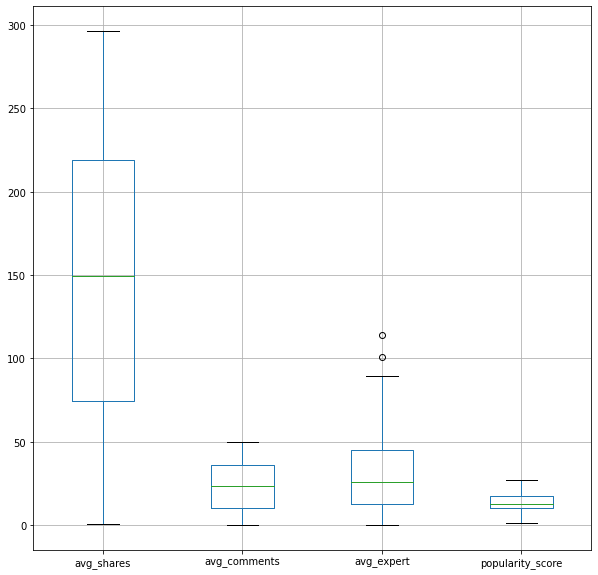

In [ ]:
#Box plot diagram also termed as Whisker’s plot is a graphical method typically depicted by quartiles and inter quartiles that helps in defining the upper limit and lower limit beyond which any data lying will be considered as outliers. 
#The very purpose of this diagram is to identify outliers and discard it from the data series before making any further observation so that the conclusion made from the study gives more accurate results not influenced by any extremes or abnormal values.
#Observation: avg_expert is the attribute possessing outliers
fig = plt.figure(figsize =(10, 10)) 
boxplot = data.boxplot(column=['avg_shares', 'avg_comments', 'avg_expert','popularity_score'])

# from the boxplot it is clear that there are two outliers in the
# average_expert coloumn. Both of the are around 100.

1.4 Normalize all attributes within the range of 0 to 1.

In [ ]:
#Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. 
#This means that the largest value for each attribute is 1 and the smallest value is 0.

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() #Scaling the values
x_scaled = min_max_scaler.fit_transform(data)
data1 =  pd.DataFrame(x_scaled, columns = data.columns) #Normalised values along with the column headers
data = data1
print (data)

     avg_shares  avg_comments  avg_expert  popularity_score
0      0.495773      0.481855    0.165347          0.511811
1      0.094352      0.030242    0.287599          0.224409
2      0.058167      0.758065    0.187335          0.251969
3      0.316199      0.098790    0.068602          0.318898
4      0.990531      0.558468    0.013193          0.751969
..          ...           ...         ...               ...
195    0.011498      0.233871    0.047493          0.062992
196    0.256003      0.538306    0.193492          0.401575
197    0.736557      0.108871    0.238347          0.417323
198    0.472100      0.038306    0.076517          0.342520
199    0.900237      0.883065    0.041337          0.937008

[200 rows x 4 columns]


**QUESTION - 2:** Visualize through scatter plots the relationship of each attribute with the target attribute.

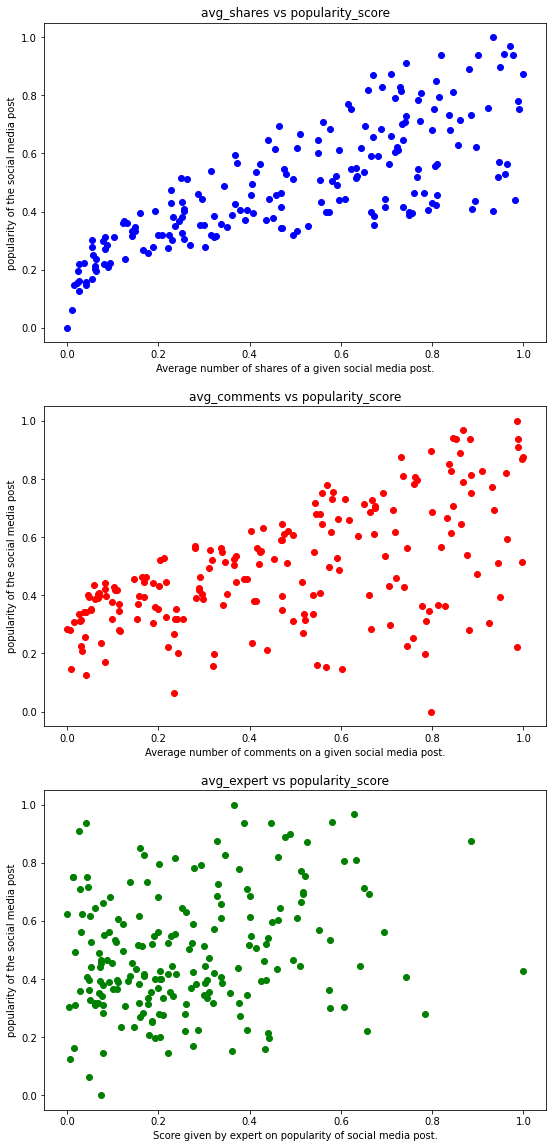

In [ ]:
fig, ax = plt.subplots(3, figsize=(9,20))

ax[0].scatter(data['avg_shares'], data['popularity_score'],color='b')
ax[0].set_xlabel('Average number of shares of a given social media post.')
ax[0].set_ylabel('popularity of the social media post')
ax[0].set_title('avg_shares vs popularity_score')

ax[1].scatter(data['avg_comments'], data['popularity_score'],color='r')
ax[1].set_xlabel('Average number of comments on a given social media post.')
ax[1].set_ylabel('popularity of the social media post')
ax[1].set_title('avg_comments vs popularity_score')

ax[2].scatter(data['avg_expert'], data['popularity_score'],color='g')
ax[2].set_xlabel('Score given by expert on popularity of social media post.')
ax[2].set_ylabel('popularity of the social media post')
ax[2].set_title('avg_expert vs popularity_score')

plt.show()

**QUESTION - 3:** Split the dataset into train and test, into 70% and 30% respectively.

In [ ]:
from sklearn.model_selection import train_test_split 
 
#In the following code, train size is 0.7, which means 70 percent of the data should be split into the training dataset and the remaining 30% should be in the testing dataset. 
# Random state is seed in this process of generating pseudo-random numbers, which makes the results reproducible by splitting the exact same observations while running every time:
 
train_data,test_data = train_test_split(data,train_size = 0.7,random_state=100)
print('train data \n',train_data)
print('test data \n',test_data)

train data 
      avg_shares  avg_comments  avg_expert  popularity_score
74     0.839026      0.546371    0.198769          0.681102
3      0.316199      0.098790    0.068602          0.318898
185    0.131214      0.828629    0.048373          0.362205
26     0.682448      0.470149    0.275286          0.590551
90     0.371999      0.818548    0.553210          0.566929
..          ...           ...         ...               ...
87     0.060873      0.243952    0.203166          0.200787
103    0.719310      0.495968    0.112577          0.606299
67     0.855935      0.429435    0.261214          0.629921
24     0.250254      0.995968    0.399296          0.515748
8      0.945215      0.203629    0.185576          0.519685

[140 rows x 4 columns]
test data 
      avg_shares  avg_comments  avg_expert  popularity_score
126    0.706459      0.415323    0.091469          0.562992
104    0.443017      0.370968    0.301671          0.444882
99     0.589787      0.453629    0.274406          

**QUESTION - 4:** Train the linear regression model and print the coefficients (parameters) learned by the final
model.

In [ ]:
from sklearn.linear_model import LinearRegression
x=train_data[['avg_shares','avg_comments','avg_expert']] #predictors or independent values
y =train_data['popularity_score'] #regressors or dependent values

# values converts it into a numpy array
# -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression

print("CO-EFFICIENT : ",linear_regressor.coef_)



CO-EFFICIENT :  [0.53342818 0.36424217 0.01997169]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


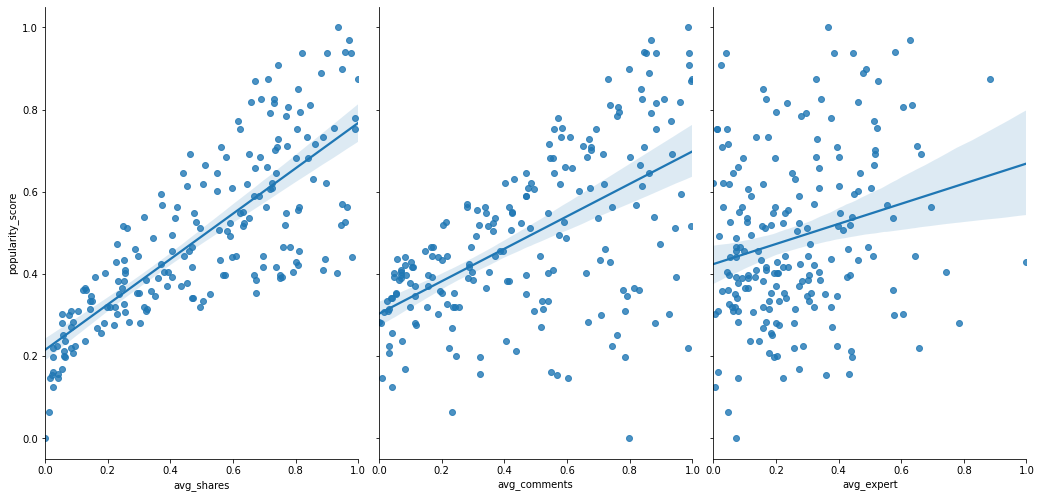

In [ ]:
sns.pairplot(data,x_vars=['avg_shares','avg_comments','avg_expert'],y_vars='popularity_score',kind='reg',size=7, aspect=0.7) 
# a visual representaion of the regressor and predictors

**QUESTION -5:** Print the confidence interval and p-value of each of the coefficients, and explain your
interpretations.

In [ ]:
from sklearn.model_selection import train_test_split

feature_col=['avg_shares','avg_comments','avg_expert']
x=data[feature_col] #predictors or independent values
y=data['popularity_score'] #regressors or dependent values


x_train,x_test,y_train,y_test=train_test_split(x,y) #the splitting is done in terms of testing and training values of feature_cols and correponding popularity scores

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy import stats
model=LinearRegression().fit(x_train,y_train) #Creating a model out of the training data

print("INTERCEPT : ",model.intercept_) #intercept of the linear regression model
print("CO-EFFICIENT : ",model.coef_) #Coefficient of regression for the model : B1 = b1 = Σ [ (xi – x)(yi – y) ] / Σ [ (xi – x)2].


INTERCEPT :  0.03591872136597901
CO-EFFICIENT :  [0.54879692 0.3778136  0.0013933 ]


In [ ]:
import statsmodels.formula.api as smf


model1 = smf.ols(formula='popularity_score ~ avg_shares + avg_comments + avg_expert', data=data).fit()
model1.pvalues # p-values for all the attributes:
# The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept       4.995042e-05
avg_shares      2.360431e-80
avg_comments    2.882299e-53
avg_expert      8.881877e-01
dtype: float64

In [ ]:
model1.conf_int(alpha = 0.05, cols = None) #Confidence Intervals: Confidence intervals measure the degree of uncertainty or certainty in a sampling method.

,0,1
Intercept,0.027214,0.076546
avg_shares,0.500990,0.566214
avg_comments,0.335399,0.403381
avg_expert,-0.056595,0.049053


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       popularity_score   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     548.3
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           4.95e-95
Time:                        06:42:42   Log-Likelihood:                 257.25
No. Observations:                 200   AIC:                            -506.5
Df Residuals:                     196   BIC:                            -493.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0519      0.013      4.148      0.000       0.027       0.077
avg_shares       0.5336      0.017     32.268      0.000       0.501       0.566
avg_comments     0.3694      0.017     21.432      0.000       0.335       0.403
avg_expert      -0.0038      0.027     -0.141      0.888      -0.057       0.049
==============================================================================
Omnibus:                       54.221   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.785
Skew:                          -1.228   Prob(JB):                     1.32e-27
Kurtosis:                       5.970   Cond. No.                         7.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

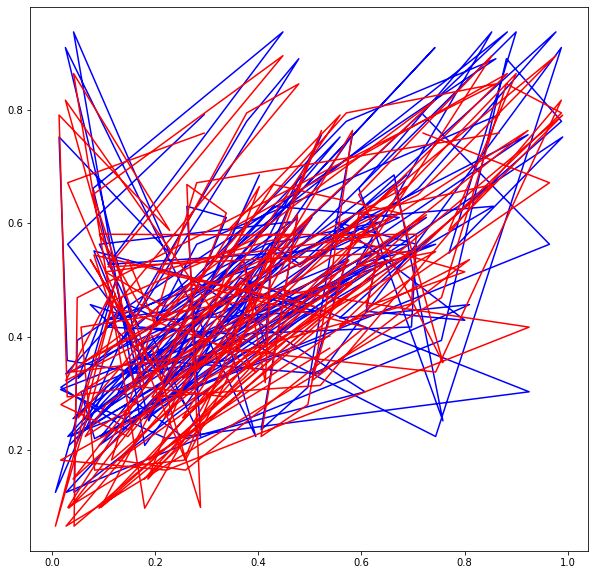

In [ ]:
fig = plt.figure(figsize =(10, 10)) # a visual representation of relationship between y_predicted vs y_True

y_pred = model.predict(x_test)
plt.plot(x_test,y_test,color='b')
plt.plot(x_test, y_pred, color='red')
plt.show()

**QUESTION- 6:** Evaluate the logistic regression model and print the values of RMSE, MAE, and MSE.

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred)) # Square and add all errors, then find the mean. Intensifies the errors 
#It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.
print(metrics.mean_absolute_error(y_test, y_pred)) # Represents average error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#Square root of MSE

#This shows that the values differ from the mean on an avg of 0.048, a squared mean value of 0.003 and RMS value of 0.06
# Also, MAE is never larger than RMSE and that is depicted in our model as well

0.003741911951112616
0.0482363366888155
0.06117116928024685


**QUESTION -7:** Plot residual curve and Q-Q plot.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residual plot')

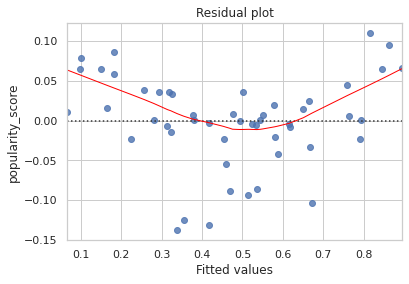

In [ ]:
sns.set_theme(style="whitegrid")
sns.residplot(y_pred.reshape(-1),y_test, data=data,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot') #It is useful in validating the assumption of linearity, by drawing a scatter plot between fitted values and residuals.

Text(0.5, 1.0, 'Residual plot')

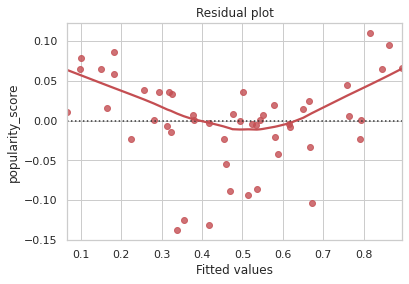

In [ ]:
#Or we can proceed as follows for the Residual plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
y_pred = model.predict(x_test)
# Plot the residuals after fitting a linear model
sns.residplot(x=y_pred, y=y_test, lowess=True, color="r")
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

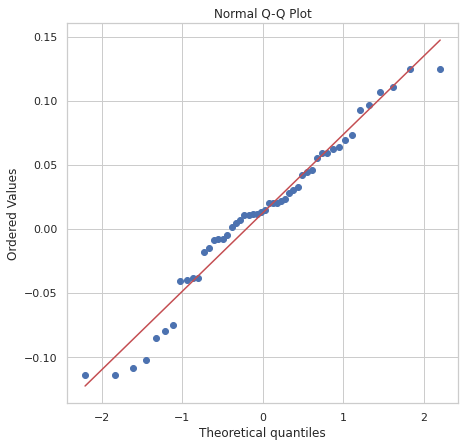

In [ ]:
import scipy.stats as stats
sns.set_theme(style="whitegrid")
residuals = y_test - y_pred.reshape(-1)
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot") #This plot depicts whether the residuals(errors) are normally distributed or not. 
#If the points lie close to the normal line then residuals are assumed to be normally distributed.